In [160]:
import pandas as pd

In [161]:
bf_data = (pd.read_csv(r"C:\Users\rthaw\Downloads\BF_Data.csv")
           .assign(Date = lambda x: pd.to_datetime(x['Month']))
           .drop('Month', axis = 1))
# change string number with , to float
bf_data['Sales'] = bf_data['Sales'].str.replace(',', '').astype(float)
bf_data

,Sales,Date
0,1587.00,2016-01-01
1,7079.00,2016-02-01
2,9656.00,2016-03-01
3,11797.00,2016-04-01
4,14297.00,2016-05-01
5,15388.00,2016-06-01
6,16424.00,2016-07-01
7,16428.00,2016-08-01
8,9575.00,2016-09-01
9,6824.00,2016-10-01


In [162]:
# add new naive
bf_data['Naive_1'] = bf_data['Sales'].shift(1).fillna(method = 'bfill')

# naive 2 is like this month + (this month - month before) * P and P = 0.5
bf_data['Naive_2_05'] = (bf_data['Sales']
					  .shift(1)
					  .fillna(method = 'bfill') 
					  + (bf_data['Sales']
						 .shift(1)
						 .fillna(method = 'bfill') 
						- bf_data['Sales']
						 .shift(2).fillna(method = 'bfill')) * 0.5)

# naive 2 is like this month + (this month - month before) * P and P = 0.5
bf_data['Naive_2_03'] = (bf_data['Sales']
						 .shift(1)
						 .fillna(method = 'bfill')
						 + (bf_data['Sales']
							.shift(1)
							.fillna(method = 'bfill')
							- bf_data['Sales']
							.shift(2).fillna(method = 'bfill')) * 0.3)

# naive 2 is like this month + (this month - month before) * P and P = 0.5
bf_data['Naive_2_08'] = (bf_data['Sales']
						 .shift(1)
						 .fillna(method = 'bfill')
						 + (bf_data['Sales']
							.shift(1)
							.fillna(method = 'bfill')
							- bf_data['Sales']
							.shift(2).fillna(method = 'bfill')) * 0.8)

# add naive 1 seasonality use month from last year
bf_data['Naive_1_Seasonality'] = (bf_data['Sales']
								  .shift(12)
								  .fillna(method = 'bfill'))

# add naive 2 seasonality ex. Feb 2019 = jan 2019 + (feb 2018 - january 2018)
bf_data['Naive_2_Seasonality'] = (bf_data['Sales']
								  .shift(1)
								  .fillna(method = 'bfill')
								  + (bf_data['Sales']
									 .shift(12)
									 .fillna(method = 'bfill')
									 - bf_data['Sales']
									 .shift(13)
									 .fillna(method = 'bfill')))

# add naive 2 seasonality_2 ex. Feb 2019 = jan 2019 + (Mar 2018 - Feb 2018)
bf_data['Naive_2_Seasonality_2'] = (bf_data['Sales']
									.shift(1)
									.fillna(method = 'bfill')
									+ (bf_data['Sales']
									   .shift(11)
									   .fillna(method = 'bfill')
									   - bf_data['Sales']
									   .shift(12)
									   .fillna(method = 'bfill')))

# bf_data drop all 2016 
bf_data = bf_data[bf_data['Date'].dt.year != 2016]
bf_data

,Sales,Date,Naive_1,Naive_2_05,Naive_2_03,Naive_2_08,Naive_1_Seasonality,Naive_2_Seasonality,Naive_2_Seasonality_2
12,22284.00,2017-01-01,3689.00,3305.00,3458.60,3074.60,1587.00,3689.00,9181.00
13,20123.00,2017-02-01,22284.00,31581.50,27862.50,37160.00,7079.00,27776.00,24861.00
14,27332.00,2017-03-01,20123.00,19042.50,19474.70,18394.20,9656.00,22700.00,22264.00
15,32646.00,2017-04-01,27332.00,30936.50,29494.70,33099.20,11797.00,29473.00,29832.00
16,40564.00,2017-05-01,32646.00,35303.00,34240.20,36897.20,14297.00,35146.00,33737.00
17,43355.00,2017-06-01,40564.00,44523.00,42939.40,46898.40,15388.00,41655.00,41600.00
18,45190.00,2017-07-01,43355.00,44750.50,44192.30,45587.80,16424.00,44391.00,43359.00
19,45262.00,2017-08-01,45190.00,46107.50,45740.50,46658.00,16428.00,45194.00,38337.00
20,26851.00,2017-09-01,45262.00,45298.00,45283.60,45319.60,9575.00,38409.00,42511.00
21,19545.00,2017-10-01,26851.00,17645.50,21327.70,12122.20,6824.00,24100.00,24484.00


In [163]:
# get rmse, mse, mae, thiel_u
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

def get_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

def get_mse(y_true, y_pred):
	# Ensure inputs are numpy arrays for consistent behavior
	y_true = np.asarray(y_true)
	y_pred = np.asarray(y_pred)

	# Check if y_pred or y_true are scalar zero, if so create an array of zeros
	if np.array_equal(y_pred, np.array([0])):
		y_pred = np.zeros(y_true.shape)

	if np.array_equal(y_true, np.array([0])):
		y_true = np.zeros(y_pred.shape)

	return mean_squared_error(y_true, y_pred)

def get_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def get_thiel_u(y_true, y_pred):
	# Ensure inputs are numpy arrays for consistent behavior
	y_true = np.asarray(y_true)
	y_pred = np.asarray(y_pred)

	# Check if y_pred or y_true are scalar zero, if so create an array of zeros
	if np.array_equal(y_pred, np.array([0])):
		y_pred = np.zeros(y_true.shape)

	if np.array_equal(y_true, np.array([0])):
		y_true = np.zeros(y_pred.shape)

	# Calculate the Thiel's U statistic
	numerator = np.sum(np.square(y_pred - y_true))
	denominator = np.sum(np.square(y_pred)) + np.sum(np.square(y_true))

	return numerator / denominator

# add mape
def get_mape(y_true, y_pred):
	# Ensure inputs are numpy arrays for consistent behavior
	y_true = np.asarray(y_true)
	y_pred = np.asarray(y_pred)

	# Check if y_pred or y_true are scalar zero, if so create an array of zeros
	if np.array_equal(y_pred, np.array([0])):
		y_pred = np.zeros(y_true.shape)

	if np.array_equal(y_true, np.array([0])):
		y_true = np.zeros(y_pred.shape)

	# Calculate the MAPE
	return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# mpe
def get_mpe(y_true, y_pred):
	# Ensure inputs are numpy arrays for consistent behavior
	y_true = np.asarray(y_true)
	y_pred = np.asarray(y_pred)

	# Check if y_pred or y_true are scalar zero, if so create an array of zeros
	if np.array_equal(y_pred, np.array([0])):
		y_pred = np.zeros(y_true.shape)

	if np.array_equal(y_true, np.array([0])):
		y_true = np.zeros(y_pred.shape)

	# Calculate the MPE
	return np.mean((y_true - y_pred) / y_true) * 100


In [164]:
# get rmse, mse, mae, thiel_u for naive_1
naive_1_rmse = get_rmse(bf_data['Sales'], bf_data['Naive_1'])
naive_1_mse = get_mse(bf_data['Sales'], bf_data['Naive_1'])
naive_1_mae = get_mae(bf_data['Sales'], bf_data['Naive_1'])
naive_1_mape = get_mape(bf_data['Sales'], bf_data['Naive_1'])
naive_1_mpe = get_mpe(bf_data['Sales'], bf_data['Naive_1'])
naive_1_thiel_u = get_thiel_u(bf_data['Sales'], bf_data['Naive_1'])

# get rmse, mse, mae, thiel_u for naive_1_seasonality
naive_1_seasonality_rmse = get_rmse(bf_data['Sales'], bf_data['Naive_1_Seasonality'])
naive_1_seasonality_mse = get_mse(bf_data['Sales'], bf_data['Naive_1_Seasonality'])
naive_1_seasonality_mae = get_mae(bf_data['Sales'], bf_data['Naive_1_Seasonality'])
naive_1_seasonality_mape = get_mape(bf_data['Sales'], bf_data['Naive_1_Seasonality'])
naive_1_seasonality_mpe = get_mpe(bf_data['Sales'], bf_data['Naive_1_Seasonality'])
naive_1_seasonality_thiel_u = get_thiel_u(bf_data['Sales'], bf_data['Naive_1_Seasonality'])

# get rmse, mse, mae, thiel_u for naive_2_seasonality
naive_2_seasonality_rmse = get_rmse(bf_data['Sales'], bf_data['Naive_2_Seasonality'])
naive_2_seasonality_mse = get_mse(bf_data['Sales'], bf_data['Naive_2_Seasonality'])
naive_2_seasonality_mae = get_mae(bf_data['Sales'], bf_data['Naive_2_Seasonality'])
naive_2_seasonality_mape = get_mape(bf_data['Sales'], bf_data['Naive_2_Seasonality'])
naive_2_seasonality_mpe = get_mpe(bf_data['Sales'], bf_data['Naive_2_Seasonality'])
naive_2_seasonality_thiel_u = get_thiel_u(bf_data['Sales'], bf_data['Naive_2_Seasonality'])

# get rmse, mse, mae, thiel_u for naive_2_seasonality_2
naive_2_seasonality_2_rmse = get_rmse(bf_data['Sales'], bf_data['Naive_2_Seasonality_2'])
naive_2_seasonality_2_mse = get_mse(bf_data['Sales'], bf_data['Naive_2_Seasonality_2'])
naive_2_seasonality_2_mae = get_mae(bf_data['Sales'], bf_data['Naive_2_Seasonality_2'])
naive_2_seasonality_2_mape = get_mape(bf_data['Sales'], bf_data['Naive_2_Seasonality_2'])
naive_2_seasonality_2_mpe = get_mpe(bf_data['Sales'], bf_data['Naive_2_Seasonality_2'])
naive_2_seasonality_2_thiel_u = get_thiel_u(bf_data['Sales'], bf_data['Naive_2_Seasonality_2'])

# get rmse, mse, mae, thiel_u for naive_2_05
naive_2_05_rmse = get_rmse(bf_data['Sales'], bf_data['Naive_2_05'])
naive_2_05_mse = get_mse(bf_data['Sales'], bf_data['Naive_2_05'])
naive_2_05_mae = get_mae(bf_data['Sales'], bf_data['Naive_2_05'])
naive_2_05_mape = get_mape(bf_data['Sales'], bf_data['Naive_2_05'])
naive_2_05_mpe = get_mpe(bf_data['Sales'], bf_data['Naive_2_05'])
naive_2_05_thiel_u = get_thiel_u(bf_data['Sales'], bf_data['Naive_2_05'])

# get rmse, mse, mae, thiel_u for naive_2_08
naive_2_08_rmse = get_rmse(bf_data['Sales'], bf_data['Naive_2_08'])
naive_2_08_mse = get_mse(bf_data['Sales'], bf_data['Naive_2_08'])
naive_2_08_mae = get_mae(bf_data['Sales'], bf_data['Naive_2_08'])
naive_2_08_mape = get_mape(bf_data['Sales'], bf_data['Naive_2_08'])
naive_2_08_mpe = get_mpe(bf_data['Sales'], bf_data['Naive_2_08'])
naive_2_08_thiel_u = get_thiel_u(bf_data['Sales'], bf_data['Naive_2_08'])

# get rmse, mse, mae, thiel_u for naive_2_03
naive_2_03_rmse = get_rmse(bf_data['Sales'], bf_data['Naive_2_03'])
naive_2_03_mse = get_mse(bf_data['Sales'], bf_data['Naive_2_03'])
naive_2_03_mae = get_mae(bf_data['Sales'], bf_data['Naive_2_03'])
naive_2_03_mape = get_mape(bf_data['Sales'], bf_data['Naive_2_03'])
naive_2_03_mpe = get_mpe(bf_data['Sales'], bf_data['Naive_2_03'])
naive_2_03_thiel_u = get_thiel_u(bf_data['Sales'], bf_data['Naive_2_03'])


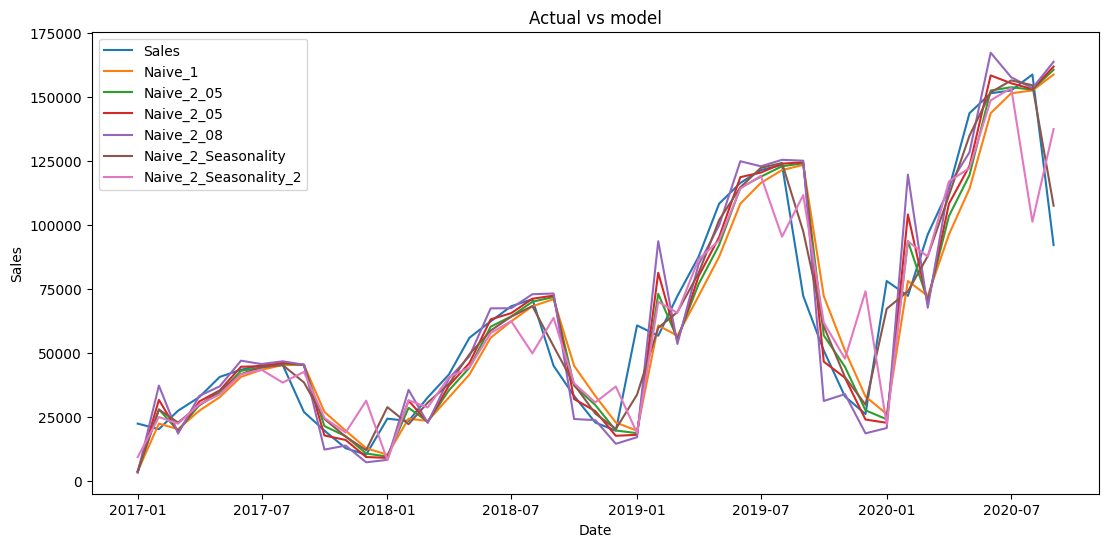

In [165]:
# plot rmse for naive_1 and naive_2
import matplotlib.pyplot as plt
# plot size 
# add line each 50000 y-axis
plt.figure(figsize = (13, 6))
plt.plot(bf_data['Date'], bf_data['Sales'], label = 'Sales')
plt.plot(bf_data['Date'], bf_data['Naive_1'], label = 'Naive_1')
plt.plot(bf_data['Date'], bf_data['Naive_2_03'], label = 'Naive_2_05')
plt.plot(bf_data['Date'], bf_data['Naive_2_05'], label = 'Naive_2_05')
plt.plot(bf_data['Date'], bf_data['Naive_2_08'], label = 'Naive_2_08')
plt.plot(bf_data['Date'], bf_data['Naive_2_Seasonality'], label = 'Naive_2_Seasonality')
plt.plot(bf_data['Date'], bf_data['Naive_2_Seasonality_2'], label = 'Naive_2_Seasonality_2')
plt.title('Actual vs model')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [166]:
# pandas setting float 2
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [167]:
# dataframe for rmse, mse, mae, thiel_u every model
result_compare = pd.DataFrame({'Model': ['Naive_1', 'Naive_2', 'Naive_1_Seasonality', 'Naive_2_Seasonality', 'Naive_2_Seasonality_2'],
							   'RMSE': [naive_1_rmse, naive_2_03_rmse, naive_1_seasonality_rmse, naive_2_seasonality_rmse, naive_2_seasonality_2_rmse],
							   'MSE': [naive_1_mse, naive_2_03_mse, naive_1_seasonality_mse, naive_2_seasonality_mse, naive_2_seasonality_2_mse],
							   'MAE': [naive_1_mae, naive_2_03_mae, naive_1_seasonality_mae, naive_2_seasonality_mae, naive_2_seasonality_2_mae],
							   'MAPE': [naive_1_mape, naive_2_03_mape, naive_1_seasonality_mape, naive_2_seasonality_mape, naive_2_seasonality_2_mape],
							   'MPE': [naive_1_mpe, naive_2_03_mpe, naive_1_seasonality_mpe, naive_2_seasonality_mpe, naive_2_seasonality_2_mpe],
							   'Thiel_u': [naive_1_thiel_u, naive_2_03_thiel_u, naive_1_seasonality_thiel_u, naive_2_seasonality_thiel_u, naive_2_seasonality_2_thiel_u]})

# print dataframe
result_compare

,Model,RMSE,MSE,MAE,MAPE,MPE,Thiel_u
0,Naive_1,19878.84,395168196.13,13684.93,27.26,-1.07,0.04
1,Naive_2,19597.15,384048214.00,12320.56,23.80,-0.31,0.03
2,Naive_1_Seasonality,27162.66,737810308.44,23380.44,42.26,42.26,0.09
3,Naive_2_Seasonality,8263.70,68288746.60,5865.31,13.86,-1.48,0.01
4,Naive_2_Seasonality_2,20833.14,434019811.33,14499.11,33.72,-10.27,0.04


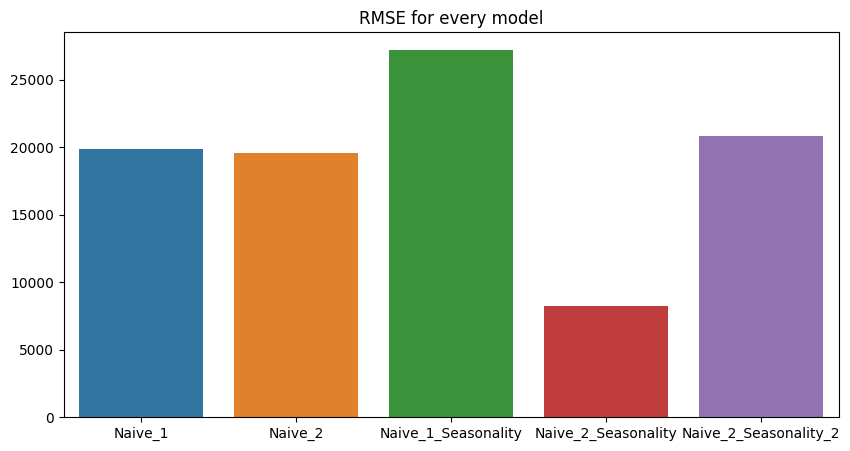

In [168]:
# plot barplot compare rmse for every model
import seaborn as sns
# plot size
plt.figure(figsize = (10, 5))
# plot barplot
sns.barplot(x = ['Naive_1', 'Naive_2', 'Naive_1_Seasonality', 'Naive_2_Seasonality', 'Naive_2_Seasonality_2'],
			y = [naive_1_rmse, naive_2_03_rmse, naive_1_seasonality_rmse, naive_2_seasonality_rmse, naive_2_seasonality_2_rmse])
plt.title('RMSE for every model')
plt.show()